# Exploring Dandiset 000690: Vision2Hippocampus project electrophysiology data

**Note:** This notebook was automatically generated by an AI assistant and has not been fully verified. Users should exercise caution when interpreting the code or results and are encouraged to review the original data and analysis methods.

## Overview of Dandiset 000690

This Dandiset contains data from the Allen Institute Openscope - Vision2Hippocampus project. The project aims to understand how neural representations of simple and natural visual stimuli evolve from the lateral geniculate nucleus (LGN) through visual cortex and hippocampus in mice.

You can access the Dandiset here: https://dandiarchive.org/dandiset/000690/0.250326.0015

## Notebook Contents

This notebook will cover:
1. Loading the Dandiset and listing its assets.
2. Loading an NWB file containing extracellular electrophysiology (LFP) data.
3. Examining the structure and metadata of the NWB file.
4. Visualizing electrode positions.
5. Analyzing the power spectral density of the LFP data.
6. Summarizing findings and suggesting future directions.

## Required Packages

This notebook requires the following Python packages:

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `seaborn`
- `numpy`
- `scipy`
- `pandas`

## Loading the Dandiset and Assets

We will use the `dandi` package to connect to the DANDI archive and access the Dandiset.

In [1]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.signal import welch
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Loading an NWB File

This Dandiset contains several NWB files. We will load one of the electrophysiology NWB files for demonstration: `sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb`.

In [2]:
import pynwb
import h5py
import remfile

# URL for the selected NWB file
nwb_url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"

# Load the NWB file
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the NWB file
print("NWB file loaded successfully.")
print(f"Session ID: {nwb.session_id}")
print(f"Session description: {nwb.session_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")

# Do not display the full nwb object as it can be very large
# print(nwb)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.
Session ID: 1298465622
Session description: LFP data and associated info for one probe
Subject ID: 692072
Species: Mus musculus
Sex: M
Age: P82D


## Summarizing NWB File Contents

This NWB file contains Local Field Potential (LFP) data and metadata about the recording electrodes.

Key contents include:

*   `acquisition/probe_0_lfp_data`: The primary LFP time series data.
*   `electrodes`: A table with metadata for each electrode channel.
*   `electrode_groups`: Information about the groups of electrodes (probes).
*   `devices`: Information about the recording devices (probes).

We can examine the structure further by looking at the available data streams.

In [3]:
# List available data streams in acquisition
print("Available data streams in acquisition:")
for key in nwb.acquisition:
    print(f"- {key} ({type(nwb.acquisition[key]).__name__})")

# Get information about the LFP data shape
lfp_data = nwb.acquisition["probe_0_lfp_data"]
print(f"\nLFP data shape: {lfp_data.data.shape}")
print(f"LFP data unit: {lfp_data.unit}")
print(f"LFP timestamps shape: {lfp_data.timestamps.shape}")

# Inspect the electrodes table
print("\nElectrodes table columns:")
print(nwb.electrodes.colnames)

# Show the first few rows of the electrodes table
electrodes_df = nwb.electrodes.to_dataframe()
print("\nFirst 5 rows of electrodes table:")
print(electrodes_df.head())

# Neurosift link to explore this NWB file
neurosift_link = f"https://neurosift.app/nwb?url={nwb_url}&dandisetId=000690&dandisetVersion=0.250326.0015"
print(f"\nExplore this NWB file on Neurosift: {neurosift_link}")

Available data streams in acquisition:
- probe_0_lfp (LFP)
- probe_0_lfp_data (ElectricalSeries)

LFP data shape: (10117092, 95)
LFP data unit: volts
LFP timestamps shape: (10117092,)

Electrodes table columns:
('location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering')

First 5 rows of electrodes table:
   location                                              group group_name  \
id                                                                          
2        PF  probeA abc.EcephysElectrodeGroup at 0x13684417...     probeA   
6        TH  probeA abc.EcephysElectrodeGroup at 0x13684417...     probeA   
10       TH  probeA abc.EcephysElectrodeGroup at 0x13684417...     probeA   
14       TH  probeA abc.EcephysElectrodeGroup at 0x13684417...     probeA   
18       LP  probeA abc.EcephysElectrodeGroup at 0x13684417...     probeA   

    probe_vertical_position  probe_horizontal_

## Visualizing Electrode Positions

Understanding the physical layout of the electrodes on the probe is important for interpreting the recorded data. We can visualize the electrode positions using the data from the `electrodes` table.

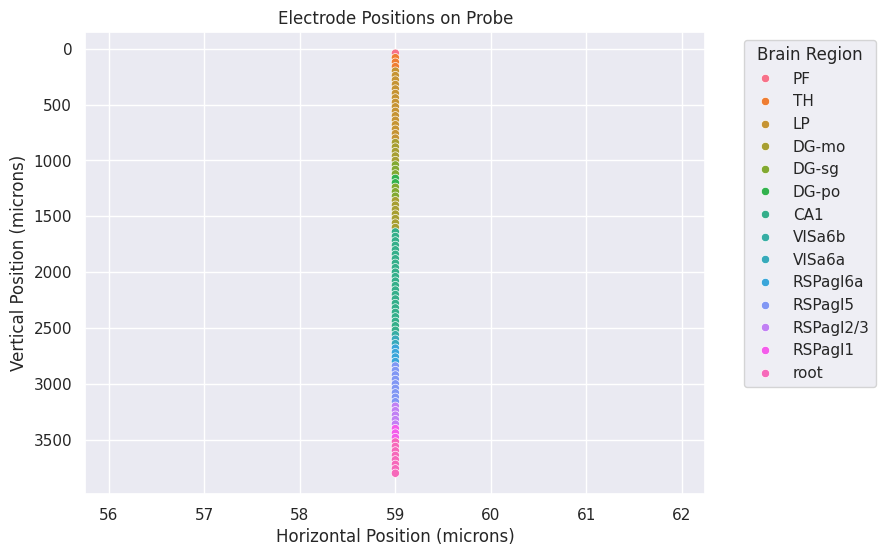

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get electrode data as a DataFrame
electrodes_df = nwb.electrodes.to_dataframe()

# Plot electrode positions
sns.set_theme()
plt.figure(figsize=(8, 6))
# Color-code by brain region if the 'location' column exists
if 'location' in electrodes_df.columns:
    # Map abbreviations to full names for better readability if possible,
    # but for now just use the abbreviations as they are
    sns.scatterplot(data=electrodes_df, x='probe_horizontal_position', y='probe_vertical_position', hue='location')
    plt.legend(title='Brain Region', bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    sns.scatterplot(data=electrodes_df, x='probe_horizontal_position', y='probe_vertical_position')

plt.xlabel('Horizontal Position (microns)')
plt.ylabel('Vertical Position (microns)')
plt.title('Electrode Positions on Probe')
plt.gca().invert_yaxis() # Invert y-axis so 0 is at the top
plt.show()

The electrode positions plot shows the spatial arrangement of the recording sites on the probe. If the `location` column is available in the electrodes table, the points are color-coded by the brain region where the electrode is located. Common abbreviations for brain regions in this dataset may include "PF" (Parafascicular nucleus), "TH" (Thalamus), and "LP" (Lateral Posterior nucleus of the thalamus), which are relevant to the visual pathway.

## Raw LFP Data Visualization

Let's visualize a short segment of the raw LFP data to get a direct look at the signal over time. We will plot traces from a few channels.

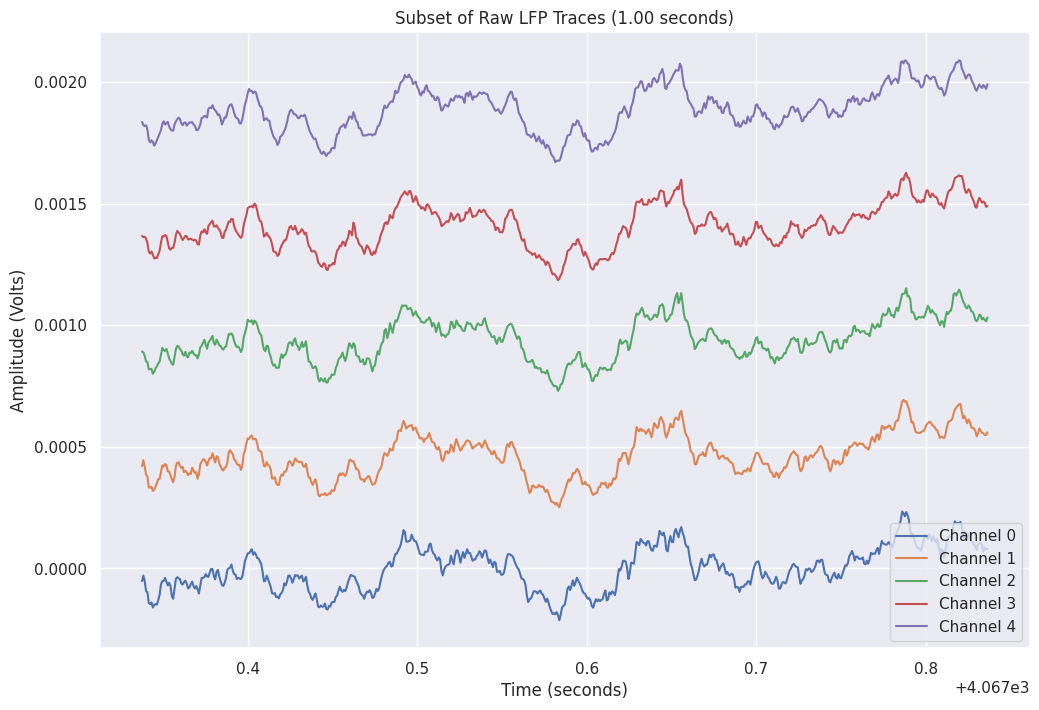

In [5]:
# Get LFP data and timestamps
lfp_data = nwb.acquisition["probe_0_lfp_data"]
timestamps = lfp_data.timestamps

# Determine a subset of data to load (e.g., 1 second from a later time point for the first 5 channels)
if hasattr(nwb.electrode_groups, 'probeA') and hasattr(nwb.electrode_groups['probeA'], 'lfp_sampling_rate'):
    sampling_rate = nwb.electrode_groups['probeA'].lfp_sampling_rate
else:
    # Fallback if sampling rate not found in expected location
    # Estimate from timestamps if possible, or use a default/placeholder
    sampling_rate = 625.0 # Assuming a typical LFP sampling rate if not found

data_shape = lfp_data.data.shape
start_time_point = int(data_shape[0] / 2) # Start from the middle of the recording
num_timepoints_to_load = int(sampling_rate * 1) # Load 1 second of data
num_channels_to_load = 5

# Ensure we don't go out of bounds
if start_time_point + num_timepoints_to_load > data_shape[0]:
     num_timepoints_to_load = data_shape[0] - start_time_point

# Access the subset of data and timestamps using slicing
# Load data into memory for plotting
lfp_subset = lfp_data.data[start_time_point : start_time_point + num_timepoints_to_load, 0:num_channels_to_load]
timestamps_subset = timestamps[start_time_point : start_time_point + num_timepoints_to_load]


# Plot LFP traces
sns.set_theme()
plt.figure(figsize=(12, 8))
for i in range(num_channels_to_load):
    # Add offset for clarity. The magnitude of the offset might need adjustment
    plt.plot(timestamps_subset, lfp_subset[:, i] + i * np.max(np.abs(lfp_subset)) * 2, label=f'Channel {i}')

plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (Volts)')
plt.title(f'Subset of Raw LFP Traces ({num_timepoints_to_load / sampling_rate:.2f} seconds)')
plt.legend()
plt.show()

## Analyzing LFP Spectrogram

Local Field Potentials (LFP) reflect the summed electrical activity of a population of neurons. Analyzing the power spectral density (PSD) of the LFP signal allows us to identify the dominant frequency components, which can be associated with different brain states or cognitive processes.

Common neural frequency bands include:

*   Delta (0.5-4 Hz): Often associated with deep sleep.
*   Theta (4-8 Hz): Linked to memory, navigation, and REM sleep.
*   Alpha (8-12 Hz): Prominent during relaxed wakefulness.
*   Beta (12-30 Hz): Involved in motor control and cognitive processes.
*   Gamma (30-100+ Hz): Associated with perception, attention, and learning.

We will calculate the PSD for a subset of data from the first few channels. Note that analyzing the full dataset might require more computational resources.

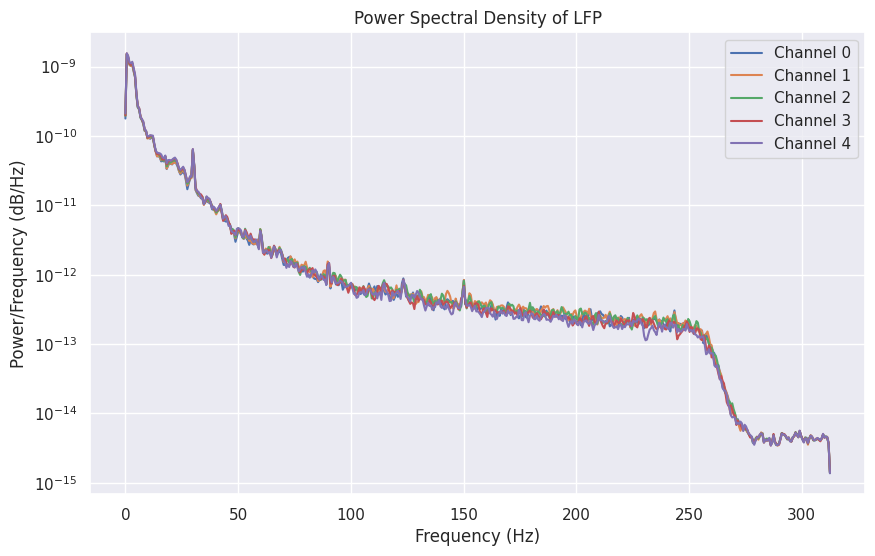

In [6]:
import numpy as np
from scipy.signal import welch

# Get LFP data
lfp_data = nwb.acquisition["probe_0_lfp_data"]
sampling_rate = nwb.electrode_groups['probeA'].lfp_sampling_rate

# Determine a subset of data to load (e.g., 60 seconds from the middle of the recording for the first 5 channels)
data_shape = lfp_data.data.shape
start_time_point = int(data_shape[0] / 2) # Start from the middle
num_timepoints_to_load = int(sampling_rate * 60) # Load 60 seconds

# Ensure we don't go out of bounds
if start_time_point + num_timepoints_to_load > data_shape[0]:
    num_timepoints_to_load = data_shape[0] - start_time_point

# Access the subset of data -- load into memory for PSD calculation
lfp_subset = lfp_data.data[start_time_point : start_time_point + num_timepoints_to_load, 0:5]

# Calculate Power Spectral Density using Welch's method
freqs, psd = welch(lfp_subset, fs=sampling_rate, nperseg=1024, axis=0)

# Plot PSD
plt.figure(figsize=(10, 6))
for i in range(psd.shape[1]):
    plt.semilogy(freqs, psd[:, i], label=f'Channel {i + 0}') # Use actual channel index if needed

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density of LFP')
plt.legend()
plt.grid(True)
plt.show()

## Summary and Future Directions

This notebook demonstrated how to access and perform initial exploration of the electrophysiology data within Dandiset 000690. We were able to visualize the linear layout of the recording probe and examine the frequency content of the LFP signal, which showed dominant power at lower frequencies and some peaks around 150 Hz.

Possible future directions for analysis include:

*   Examining LFP activity in relation to the presented visual stimuli.
*   Analyzing LFP across different probes and brain regions within the Dandiset.
*   Investigating the units (spikes) data if available in other NWB files in the Dandiset.
*   Performing more advanced spectral analysis or time-frequency analysis of the LFP.
*   Comparing electrophysiology data with imaging data available in other NWB files.

In [7]:
# It is good practice to close the NWB file when done
io.close()